# 딥러닝응용 참고코드
텐서플로우를 사용해서 코드 작성
abalone dataset에 대해 CNN, LSTM으로 분류를 수행하라

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [15]:
df = pd.read_csv('abalone.csv')
df.head()

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [16]:
# Check Null
df.isna().sum()

,0
id,0
Sex,0
Length,0
Diameter,0
Height,0
Whole_weight,0
Shucked_weight,0
Viscera_weight,0
Shell_weight,0
Rings,0


In [29]:
# Drop ID
df = df.drop(['id'], axis=1)
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [31]:
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Text(0.5, 1.0, 'Abalone')

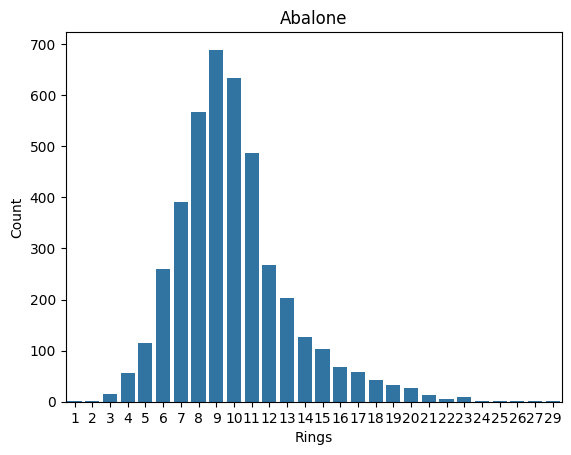

In [32]:
# Target Distribution

sns.countplot(data = df, x="Rings")
plt.xlabel("Rings")
plt.ylabel("Count")
plt.title("Abalone")

In [33]:
# df 데이터를 8:2로 나누기
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

# df_train과 df_test를 확인할 수 있습니다.
print("Training data size:", df_train.shape)
print("Test data size:", df_test.shape)

Training data size: (3341, 9)
Test data size: (836, 9)


In [34]:
df_train.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
4038,I,0.550,0.445,0.125,0.6720,0.2880,0.1365,0.210,11
1272,I,0.475,0.355,0.100,0.5035,0.2535,0.0910,0.140,8
3384,F,0.305,0.225,0.070,0.1485,0.0585,0.0335,0.045,7
3160,I,0.275,0.200,0.065,0.1165,0.0565,0.0130,0.035,7
3894,M,0.495,0.380,0.135,0.6295,0.2630,0.1425,0.215,12


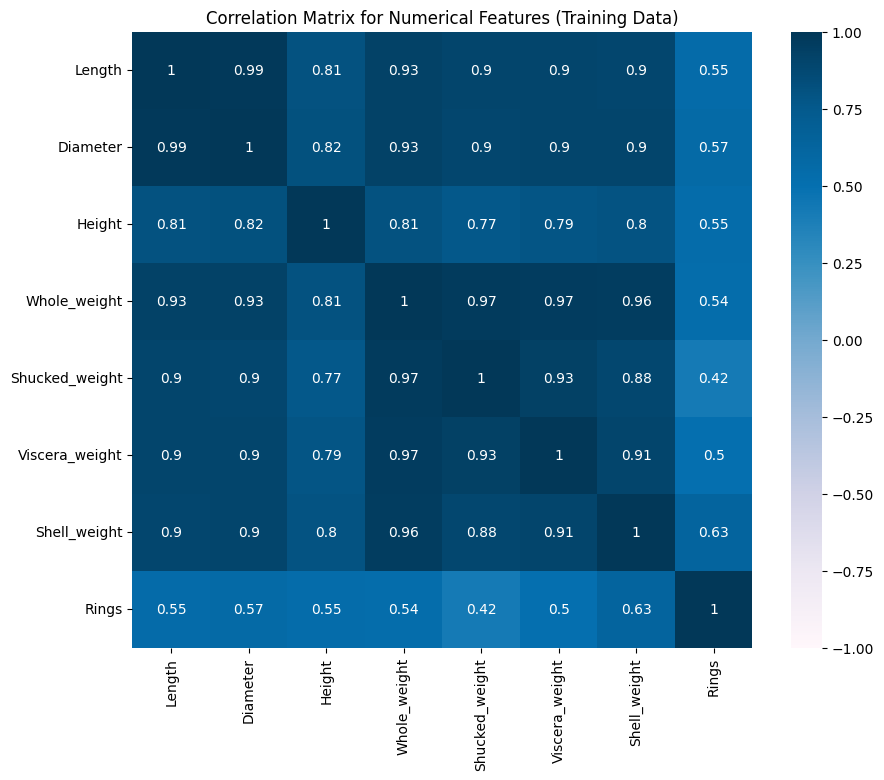

In [35]:
# Plot correlation matrix for numerical features
numerical_features = df_train.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df_train[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='PuBu', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Numerical Features (Training Data)')
plt.show()

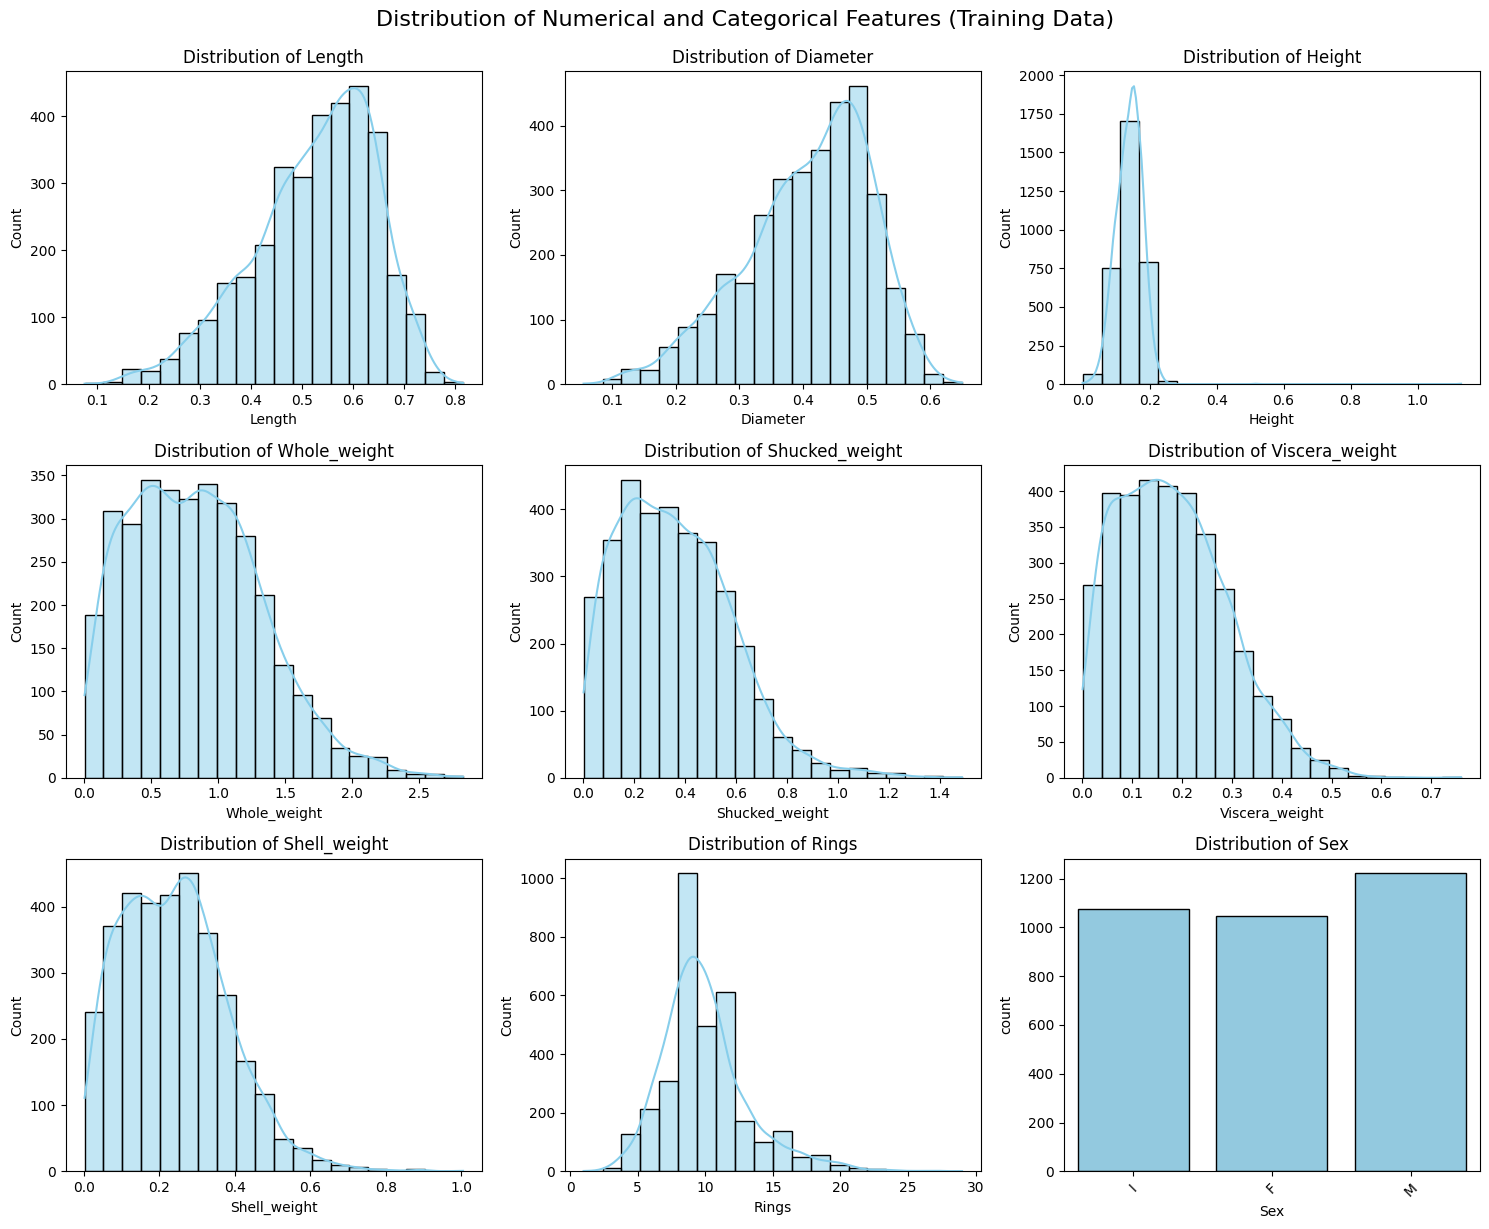

In [40]:
# Select numerical and categorical features
numerical_features = df_train.select_dtypes(include=['float64', 'int64']).columns
categorical_features = df_train.select_dtypes(include=['object', 'category']).columns

# Combine numerical and categorical features into a single list (assuming there are 9 total)
all_features = list(numerical_features) + list(categorical_features)

# Create a 3x3 grid plot for all features with the same color (skyblue)
plt.figure(figsize=(15, 12))  # Adjust figure size for a 3x3 grid

for i, feature in enumerate(all_features):
    plt.subplot(3, 3, i + 1)  # Create a 3x3 grid
    if feature in numerical_features:
        sns.histplot(df_train[feature], bins=20, kde=True, color='skyblue', edgecolor='black')
        plt.title(f'Distribution of {feature}')
    elif feature in categorical_features:
        sns.countplot(data=df_train, x=feature, color='skyblue', edgecolor='black')
        plt.title(f'Distribution of {feature}')
        plt.xticks(rotation=45)

    plt.tight_layout()

plt.suptitle('Distribution of Numerical and Categorical Features (Training Data)', fontsize=16, y=1.02)
plt.show()

In [57]:
# Label Encoding for categorical variables
sex_encoder = LabelEncoder()
rings_encoder = LabelEncoder()

# Remove small classes
min_count_threshold = 20
class_counts = df['Rings'].value_counts()
classes_to_keep = class_counts[class_counts > min_count_threshold].index
df_filtered = df[df['Rings'].isin(classes_to_keep)]

new_class_distribution = df_filtered['Rings'].value_counts().sort_index()

# Encode the 'Sex' and 'Rings' columns using .loc to avoid warnings
df_filtered.loc[:, 'Sex'] = sex_encoder.fit_transform(df_filtered['Sex'])
df_filtered.loc[:, 'Rings'] = rings_encoder.fit_transform(df_filtered['Rings'])

# Create Target
x = df_filtered.drop(['Rings'], axis=1)
y = df_filtered['Rings']

# Oversampling
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

x_resampled_df = pd.DataFrame(x_resampled, columns=x.columns)
x_resampled_df['Sex'] = x_resampled_df['Sex'].astype(int)

Text(0.5, 1.0, 'Abalone')

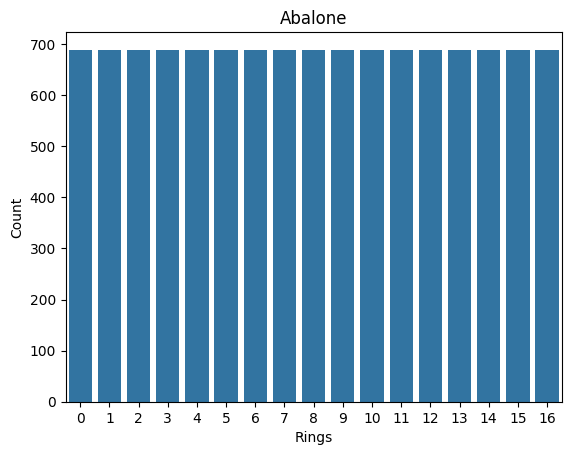

In [64]:
# Target Distribution (oversampled)
y_resampled_df = pd.DataFrame(y_resampled, columns=['Rings'])
sns.countplot(data = y_resampled_df , x="Rings")
plt.xlabel("Rings")
plt.ylabel("Count")
plt.title("Abalone")

### 시퀀스 생성
n개의 window 중 가장 많이 등장한 라벨값을 시퀀스 라벨로 지정

In [41]:
from collections import Counter
import numpy as np

def split_sequences(sequences, n_steps):
    X, y = list(), list()  # 빈 리스트를 생성하여 시퀀스 데이터와 레이블을 담을 공간을 만듦
    for i in range(len(sequences)):  # 전체 시퀀스 데이터를 순회
        # find the end of this pattern
        end_ix = i + n_steps  # 현재 인덱스(i)에서 n_steps만큼 떨어진 시퀀스의 끝을 계산
        # check if we are beyond the dataset
        if end_ix > len(sequences):  # 시퀀스 끝이 데이터의 범위를 넘어서는지 확인
            break  # 범위를 넘으면 루프 종료
        # gather input (X) and output parts (y)
        seq_x = sequences[i:end_ix, :-1]  # 입력 데이터 (특징 데이터)
        seq_y_values = sequences[i:end_ix, -1]  # 시퀀스 동안의 출력 데이터 (레이블들)

        # 가장 빈번하게 나온 레이블 찾기
        most_common_label = Counter(seq_y_values).most_common(1)[0][0]

        X.append(seq_x)  # 입력 데이터 추가
        y.append(most_common_label)  # 가장 많이 나온 레이블 추가

    return np.array(X), np.array(y)  # 리스트를 numpy 배열로 변환하여 반환

In [58]:
# Create sequence
n_steps = 5

y_resampled = np.array(y_resampled).reshape(-1, 1)
resampled_data = np.hstack((x_resampled_df.values, y_resampled))
X, y = split_sequences(resampled_data, n_steps)

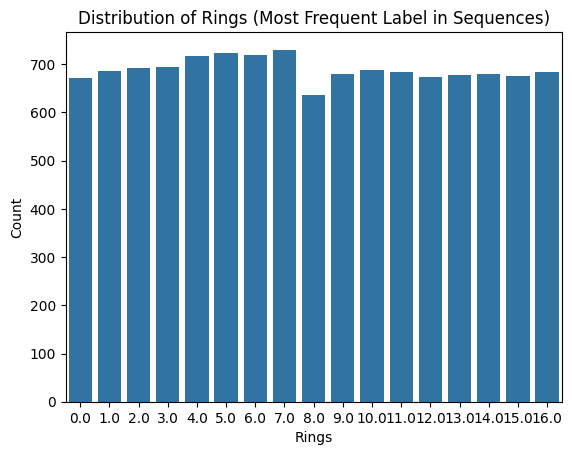

In [66]:
# After Sequence Formation
y_sequences_df = pd.DataFrame(y, columns=['Rings'])

sns.countplot(data=y_sequences_df, x="Rings")
plt.xlabel("Rings")
plt.ylabel("Count")
plt.title("Distribution of Rings (Most Frequent Label in Sequences)")
plt.show()

In [75]:
# Determine the number of classes
num_classes = len(np.unique(y))
print(f"Number of classes: {num_classes}")

Number of classes: 17


In [69]:
from tensorflow.keras.utils import to_categorical
# One-hot encoding for target variable (y)
y_one_hot = to_categorical(y, num_classes=num_classes)

In [71]:
# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

## CNN Classification

In [104]:
from keras.models import Model
from keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense

In [105]:
input_shape = (X_train.shape[1], X_train.shape[2])  # (timesteps, features)

In [112]:
# CNN Model
inputs = Input(shape=input_shape)

# Convolutional Layer 1
conv1 = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(inputs)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# Convolutional Layer 2
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(pool1)
pool2 = MaxPooling1D(pool_size=2)(conv2)

# Flatten the output
flatten = Flatten()(pool2)

# Dense Layers
dense1 = Dense(128, activation='relu')(flatten)
outputs = Dense(num_classes, activation='softmax')(dense1)

# Model
cnn_model = Model(inputs=inputs, outputs=outputs)
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)          │ (None, 5, 8)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_14 (Conv1D)                   │ (None, 5, 128)              │           3,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_9 (MaxPooling1D)       │ (None, 2, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_15 (Conv1D)                   │ (None, 2, 64)               │          24,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_10 (MaxPooling1D)      │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 17)                  │           2,193 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,353 (149.82 KB)

 Trainable params: 38,353 (149.82 KB)

 Non-trainable params: 0 (0.00 B)

In [113]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
cnn_history = cnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping_cb])

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.1307 - loss: 2.5658 - val_accuracy: 0.2289 - val_loss: 2.2029
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2479 - loss: 2.1317 - val_accuracy: 0.3255 - val_loss: 1.9028
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3183 - loss: 1.8319 - val_accuracy: 0.3490 - val_loss: 1.7652
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3446 - loss: 1.7343 - val_accuracy: 0.3447 - val_loss: 1.7421
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3544 - loss: 1.7438 - val_accuracy: 0.3661 - val_loss: 1.7065
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3699 - loss: 1.6756 - val_accuracy: 0.3815 - val_loss: 1.6876
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3834 - loss: 1.6455 - val_accuracy: 0.3730 - val_loss: 1.6539
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3841 - loss: 1.6318 - val_accuracy: 0.

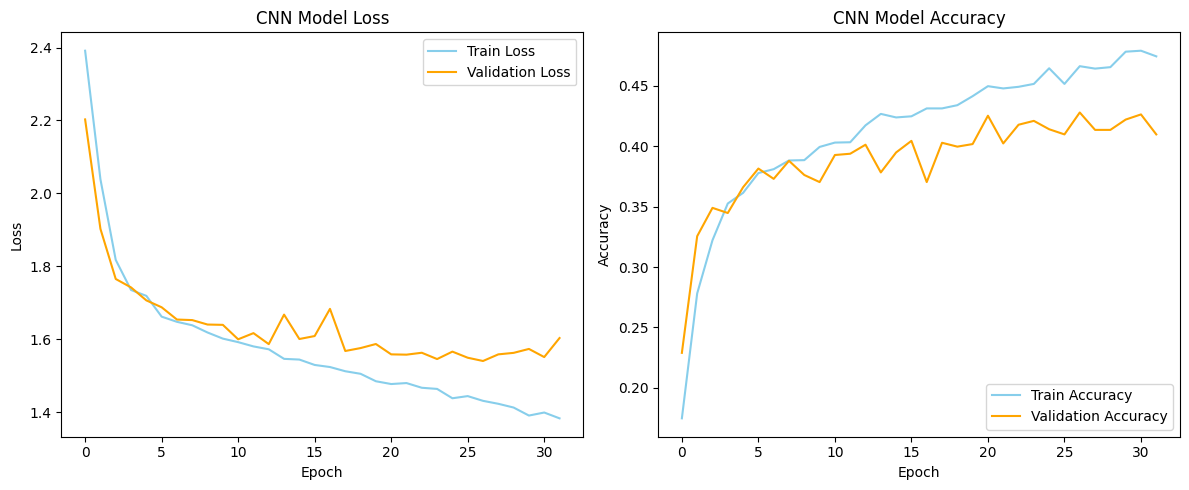

In [114]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['loss'], label='Train Loss', color='skyblue')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy', color='skyblue')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Show the plots
plt.tight_layout()
plt.show()

In [115]:
cnn_model.evaluate(X_train, y_train)

293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4847 - loss: 1.3880


[1.4170804023742676, 0.47218960523605347]

In [116]:
cnn_model.evaluate(X_test, y_test)

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4004 - loss: 1.5949


[1.5750941038131714, 0.41844576597213745]

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


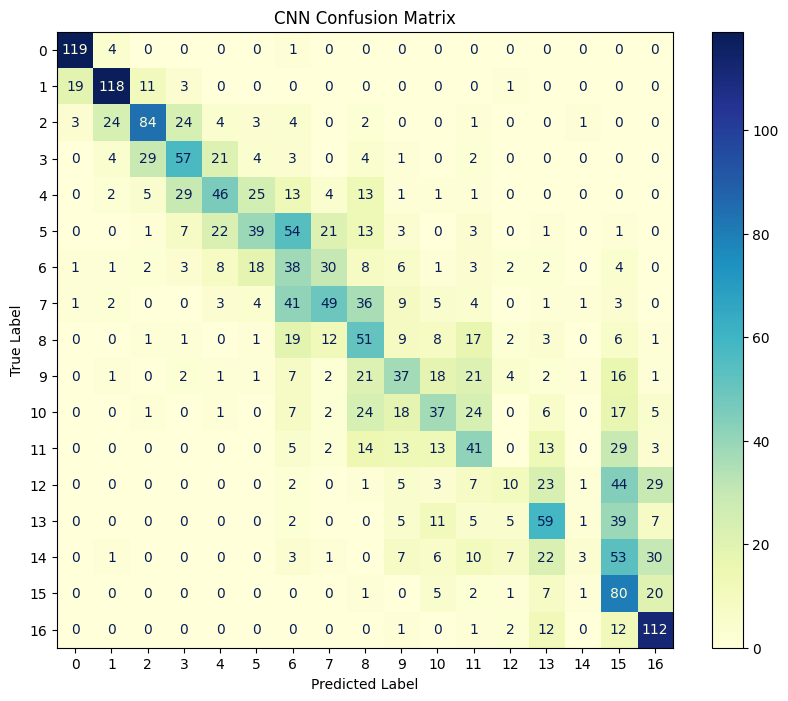

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make predictions
y_pred = cnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_true_classes))
disp.plot(cmap='YlGnBu', ax=plt.gca(), colorbar=True)

plt.title('CNN Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### LSTM Classification


In [77]:
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow import keras

In [72]:
# Define LSTM Model
input_shape = (X_train.shape[1], X_train.shape[2])  # (timesteps, features)

#### Simple LSTM

In [80]:
# LSTM Model
inputs = Input(shape=input_shape)

# LSTM Layer
lstm = LSTM(50, return_sequences=False)(inputs)

# Dense layers
dense1 = Dense(50, activation='relu')(lstm)
outputs = Dense(17, activation='softmax')(dense1)

# Model
lstm_model = keras.Model(inputs=inputs, outputs=outputs)
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
lstm_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 5, 8)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          11,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 17)                  │             867 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,217 (59.44 KB)

 Trainable params: 15,217 (59.44 KB)

 Non-trainable params: 0 (0.00 B)

#### Complex LSTM

In [91]:
# LSTM Model
inputs = Input(shape=input_shape)

# LSTM Layer
lstm = LSTM(128, return_sequences=True)(inputs)  # Set return_sequences=True for the next LSTM layer
lstm2 = LSTM(64, return_sequences=False)(lstm)  # Set return_sequences=False for the last LSTM layer

# Dense Layer
dense1 = Dense(64, activation='relu')(lstm2)
dense2 = Dense(32, activation='relu')(dense1)
outputs = Dense(17, activation='softmax')(dense2)

lstm_model = keras.Model(inputs=inputs, outputs=outputs)
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
lstm_model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 5, 8)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 5, 128)              │          70,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 17)                  │             561 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 126,353 (493.57 KB)

 Trainable params: 126,353 (493.57 KB)

 Non-trainable params: 0 (0.00 B)

In [92]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
lstm_history = lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping_cb])

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.1415 - loss: 2.5730 - val_accuracy: 0.2481 - val_loss: 2.1465
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.2422 - loss: 2.1553 - val_accuracy: 0.2604 - val_loss: 1.9790
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.2849 - loss: 1.9293 - val_accuracy: 0.3159 - val_loss: 1.8568
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.3191 - loss: 1.8481 - val_accuracy: 0.3255 - val_loss: 1.8274
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.3154 - loss: 1.8150 - val_accuracy: 0.3399 - val_loss: 1.8050
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.3398 - loss: 1.7822 - val_accuracy: 0.3132 - val_loss: 1.8527
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.3397 - loss: 1.7795 - val_accuracy: 0.3554 - val_loss: 1.7357
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.3547 - loss: 1.7255 - val_accu

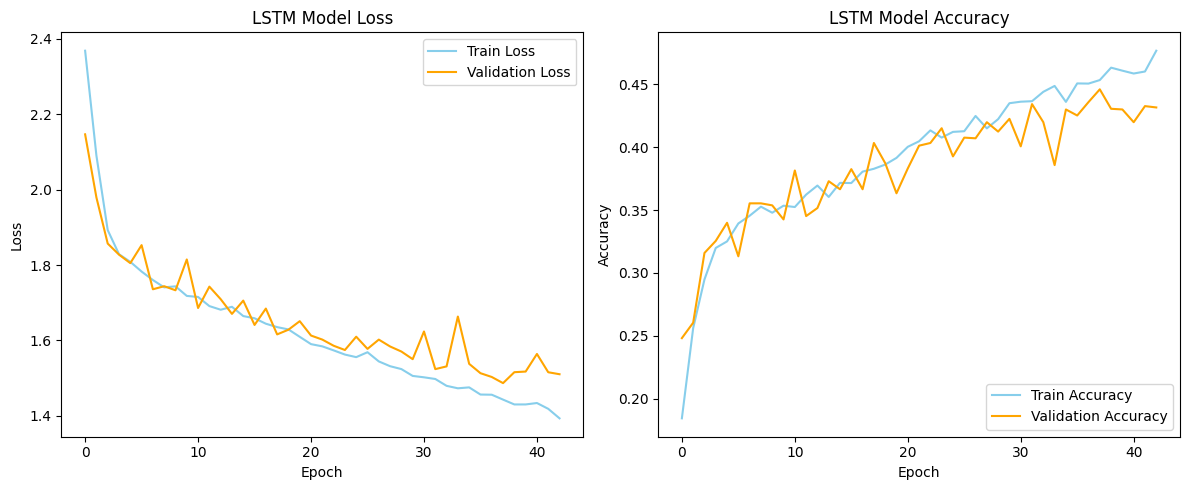

In [119]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['loss'], label='Train Loss', color='skyblue')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['accuracy'], label='Train Accuracy', color='skyblue')
plt.plot(lstm_history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('LSTM Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Show the plots
plt.tight_layout()
plt.show()

In [94]:
lstm_model.evaluate(X_train, y_train)

293/293 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4750 - loss: 1.3952


[1.4111642837524414, 0.46877336502075195]

In [117]:
lstm_model.evaluate(X_test, y_test)

74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4230 - loss: 1.5318


[1.5257207155227661, 0.4321092963218689]

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


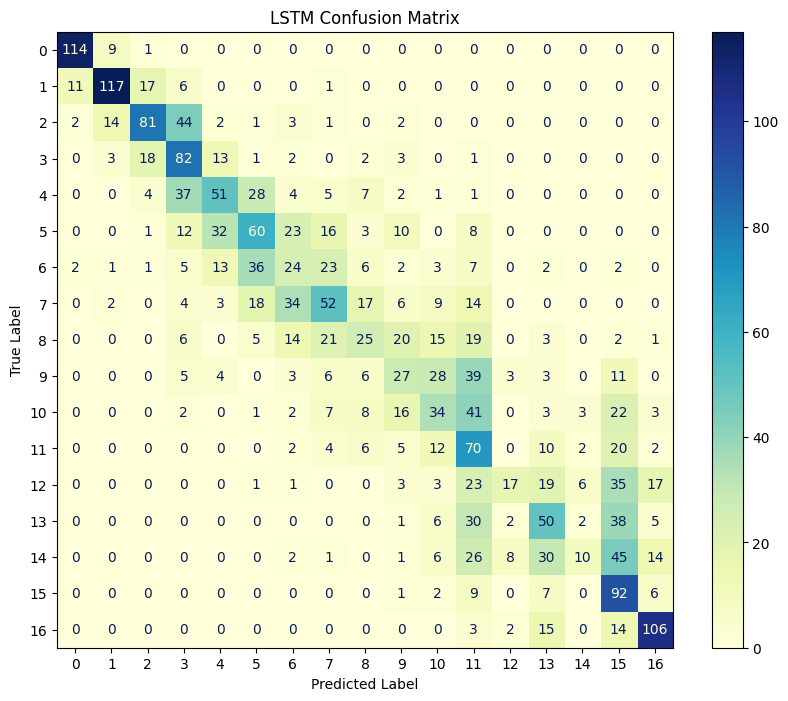

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make predictions
y_pred = lstm_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_true_classes))
disp.plot(cmap='YlGnBu', ax=plt.gca(), colorbar=True)

plt.title('LSTM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()